In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas
import requests
import json
import warnings
warnings.filterwarnings('ignore')
 

In [17]:
# Load your data into a Pandas DataFrame
df = pd.read_csv("../Resources/projectdata.csv")
df


,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076


In [18]:
#import files and read the data
main_data_path = Path("../Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076


In [19]:
# Calculate average CO2 emissions per country
co2_emissions_by_country =main_data.groupby('Country')['co2 Emissions (metric tons per capita)'].mean()
co2_emissions_by_country

# low_co2_emissions_avg = co2_emissions_by_country[co2_emissions_by_country['co2 Emission (metric tons per capita)'] == 'Low']['Low-carbon electricity (% electricity)'].mean()
# high_co2_emissions_avg = co2_emissions_by_country[co2_emissions_by_country['co2 Emission (metric tons per capita'] == 'High']['Low-carbon electricity (% electricity)'].mean()




Country
Algeria                  171250.0
Angola                    25210.0
Antigua and Barbuda         520.0
Argentina                168100.0
Austria                   64770.0
                          ...    
United Arab Emirates     188860.0
United Kingdom           348920.0
United States           4817720.0
Uruguay                    6490.0
Vanuatu                     210.0
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [20]:
# Set your CO2 emissions threshold

threshold = 33200000000

main_data['co2-emission catagory'] = ['High' if x > threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,Low
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,Low
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,Low
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,Low
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,Low
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,Low
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,Low
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,Low


In [21]:
main_data['co2 Emissions (metric tons per capita)']

0       171250.0
1        25210.0
2          520.0
3       168100.0
4        64770.0
         ...    
98      188860.0
99      348920.0
100    4817720.0
101       6490.0
102        210.0
Name: co2 Emissions (metric tons per capita), Length: 103, dtype: float64

In [22]:
main_data['co2-emission catagory'].unique()

array(['Low'], dtype=object)

In [23]:
low_co2_avg = main_data[main_data['co2-emission catagory'] == 'Low']['Low-carbon electricity (% electricity)'].mean()
high_co2_avg = main_data[main_data['co2-emission catagory'] == 'High']['Low-carbon electricity (% electricity)'].mean()



# Print the results
print(f'Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: {low_co2_avg}')
print(f'Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: {high_co2_avg}')

Average Low-Carbon Electricity Percentage for Low CO2 Emissions Countries: 35.25776505116505
Average Low-Carbon Electricity Percentage for High CO2 Emissions Countries: nan


In [101]:
# Set your CO2 emissions threshold

threshold = 4.2637648

main_data['co2-emission catagory'] = ['High' if x > threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,High
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,High
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,High
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,High
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,High
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,High
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,High
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,High


In [105]:
# Set x axis and tick locations
x_axis = np.arange(len(main_data))
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x1d6a124fec8>,
 [Text(0, 0, 'Algeria'),
  Text(0, 0, 'Angola'),
  Text(0, 0, 'Antigua and Barbuda'),
  Text(0, 0, 'Argentina'),
  Text(0, 0, 'Austria'),
  Text(0, 0, 'Azerbaijan'),
  Text(0, 0, 'Bahrain'),
  Text(0, 0, 'Bangladesh'),
  Text(0, 0, 'Barbados'),
  Text(0, 0, 'Belarus'),
  Text(0, 0, 'Belgium'),
  Text(0, 0, 'Benin'),
  Text(0, 0, 'Burkina Faso'),
  Text(0, 0, 'Cambodia'),
  Text(0, 0, 'Canada'),
  Text(0, 0, 'Central African Republic'),
  Text(0, 0, 'Chad'),
  Text(0, 0, 'China'),
  Text(0, 0, 'Comoros'),
  Text(0, 0, 'Croatia'),
  Text(0, 0, 'Cuba'),
  Text(0, 0, 'Denmark'),
  Text(0, 0, 'Djibouti'),
  Text(0, 0, 'Dominican Republic'),
  Text(0, 0, 'El Salvador'),
  Text(0, 0, 'Equatorial Guinea'),
  Text(0, 0, 'Estonia'),
  Text(0, 0, 'Fiji'),
  Text(0, 0, 'Finland'),
  Text(0, 0, 'France'),
  Text(0, 0, 'Gabon'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'Ghana'),
  Text(0, 0, 'Greece'),
  Text(0, 0, 'Grenada'),
  Text(0, 0, 'Guinea'),
  Text(0

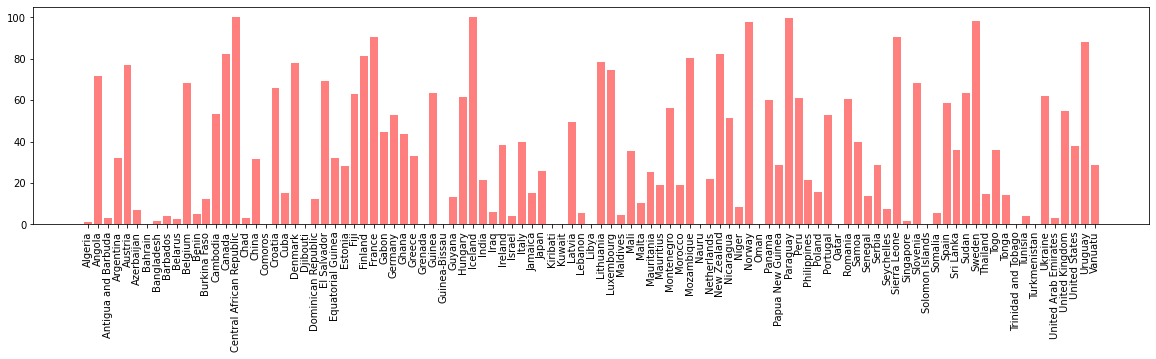

In [111]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, main_data["Low-carbon electricity (% electricity)"], color='r', alpha=0.5, align="center" )
plt.xticks(tick_locations, main_data["Country"], rotation="vertical")

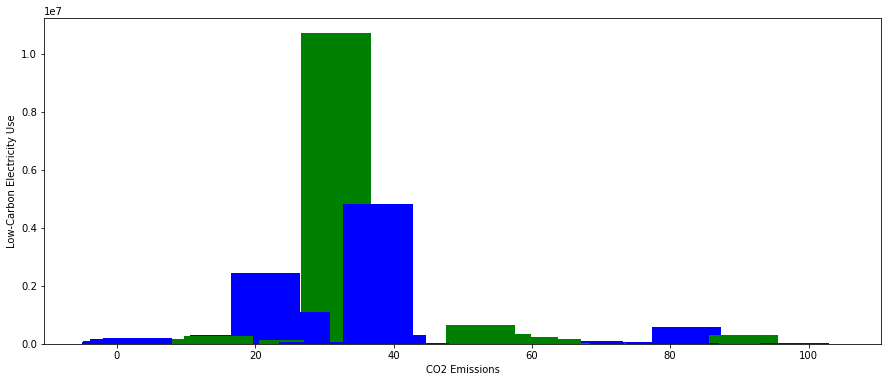

In [112]:

plt.figure(figsize=(15,6))
plt.bar(df['Low-carbon electricity (% electricity)'],df['co2 Emissions (metric tons per capita)'] ,width=10 ,color=['blue','green'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.show()

In [61]:
main_data.values

array([[0, 'Algeria', 19.45521978021977, ..., 43451666,
        26.014484799999998, 'High'],
       [1, 'Angola', 25.890109890109876, ..., 33428485, 2005.71407622,
        'High'],
       [2, 'Antigua and Barbuda', 26.725274725274733, ..., 92664,
        300.55039560000006, 'High'],
       ...,
       [100, 'United States', 15.26043956043955, ..., 335942003,
        8282.755467199999, 'High'],
       [101, 'Uruguay', 16.787637362637355, ..., 3429086,
        12142.892075999998, 'High'],
       [102, 'Vanuatu', 24.085439560439585, ..., 311685, 1005.01468362,
        'High']], dtype=object)

In [62]:
main_data.index


RangeIndex(start=0, stop=103, step=1)

Text(0.5, 1.0, 'Relationship between CO2 Emissions and Low-Carbon Electricity Use')

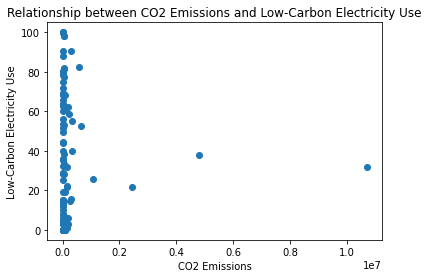

In [25]:
# Create a scatter plot
plt.scatter(df['co2 Emissions (metric tons per capita)'], df['Low-carbon electricity (% electricity)'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Low-Carbon Electricity Use')
plt.title('Relationship between CO2 Emissions and Low-Carbon Electricity Use')

In [26]:
category_means = main_data.groupby('co2 Emissions (metric tons per capita)')['Low-carbon electricity (% electricity)'].mean()
category_means

co2 Emissions (metric tons per capita)
60.0            0.000000
90.0            0.000000
160.0          14.285714
210.0          28.571428
240.0         100.000000
                 ...    
657400.0       52.611385
1081570.0      25.860157
2456300.0      21.475914
4817720.0      37.759180
10707220.0     31.672895
Name: Low-carbon electricity (% electricity), Length: 101, dtype: float64

In [55]:
y=category_means.index
y

Float64Index([      60.0,       90.0,      160.0,      210.0,      240.0,
                   300.0,      320.0,      330.0,      360.0,      420.0,
              ...
                295130.0,   300520.0,   317240.0,   348920.0,   580210.0,
                657400.0,  1081570.0,  2456300.0,  4817720.0, 10707220.0],
             dtype='float64', name='co2 Emissions (metric tons per capita)', length=101)

In [81]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

In [54]:
x=category_means.values
x

array([0.00000000e+00, 0.00000000e+00, 1.42857140e+01, 2.85714280e+01,
       1.00000000e+02, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94117640e+00, 7.54717000e+00,
       5.71428600e+00, 9.04762000e+01, 3.92156860e+00, 6.28318600e+01,
       1.00000000e+02, 1.01449280e+01, 4.68750000e+00, 8.19672100e+00,
       3.22580650e+00, 3.57142870e+01, 5.62682200e+01, 1.31147540e+01,
       4.44334805e+01, 1.90938510e+01, 1.22093020e+01, 5.15625000e+01,
       4.46902660e+01, 3.21428570e+01, 3.52409630e+01, 8.82243040e+01,
       5.00000000e+00, 8.04917200e+01, 4.95341600e+01, 2.88288290e+01,
       6.92821400e+01, 9.98573150e+01, 1.52941180e+01, 7.47663500e+01,
       2.81208950e+01, 1.39264980e+01, 7.86624150e+01, 6.00577470e+01,
       6.83448700e+01, 5.33727870e+01, 6.59557700e+01, 1.15740740e-01,
       4.38585970e+01, 6.33353800e+01, 3.59345470e+01, 7.15584400e+01,
       1.53097790e+01, 1.22470150e+01, 5.50098230e+00, 7.81768900e+01,
      

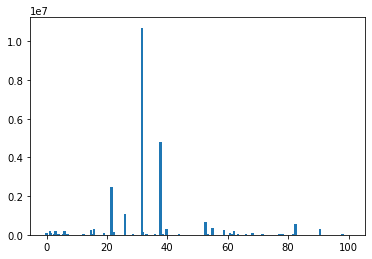

In [60]:
plt.bar(category_means.values, category_means.index)
plt.show()

In [82]:
print(type (category_means))

<class 'pandas.core.series.Series'>


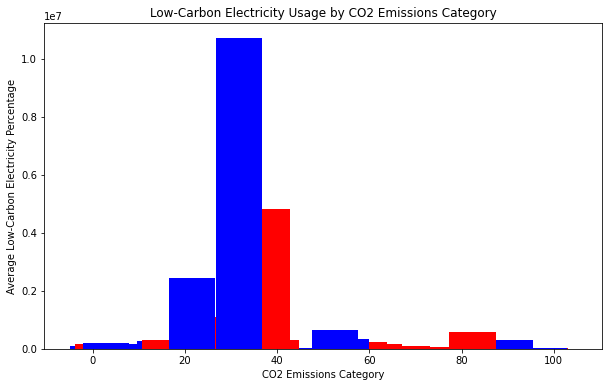

In [58]:
# Create a bar graph

plt.figure(figsize=(10,6))
plt.bar(x,y , width=10 ,color=['blue','red'])
plt.xlabel('CO2 Emissions Category')
plt.ylabel('Average Low-Carbon Electricity Percentage')
plt.title('Low-Carbon Electricity Usage by CO2 Emissions Category')





plt.show()

In [114]:
# Set your CO2 emissions threshold

threshold = 4.2637648

main_data['co2-emission catagory2'] = ['High' if x < threshold else 'Low' for x in main_data['co2 Emissions (metric tons per capita)']]
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person),co2-emission catagory,co2-emission catagory2
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485,Low,Low
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076,Low,Low
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396,Low,Low
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043,Low,Low
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213,Low,Low
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224,Low,Low
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467,Low,Low
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076,Low,Low


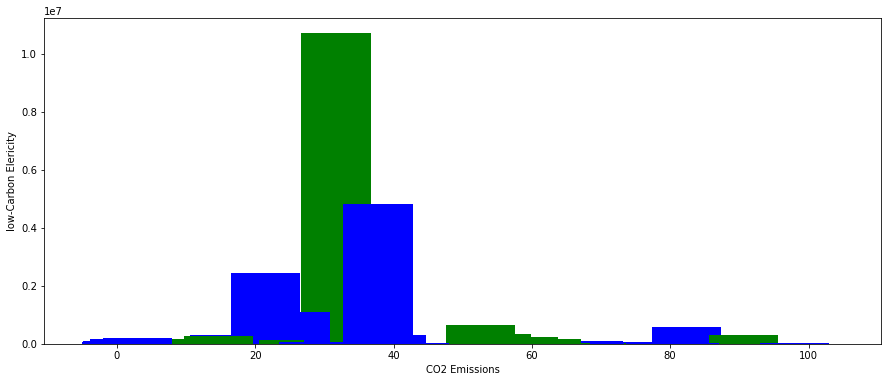

In [117]:
plt.figure(figsize=(15,6))
plt.bar(df['Low-carbon electricity (% electricity)'],df['co2 Emissions (metric tons per capita)'] ,width=10 ,color=['blue','green'])
plt.xlabel('CO2 Emissions')
plt.ylabel('low-Carbon Elericity')
plt.show()